### Visual Analysis

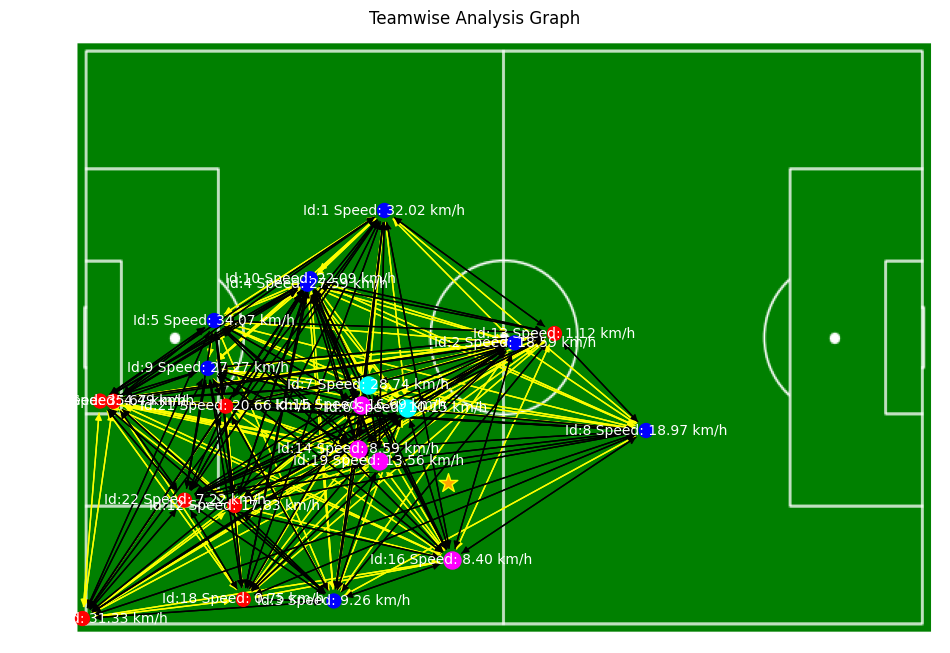

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

def create_relationship_graph(player_boxes, ball_box):
    G = nx.DiGraph()
    player_ids = list(range(1, len(player_boxes) + 1))
    random.shuffle(player_ids)
    
    # nodes for players and ball
    for player_id, player_box in zip(player_ids, player_boxes):
        player_speed = calculate_speed()
        team_id = player_id // 11 
        G.add_node(player_id, bbox=player_box, speed=player_speed, team=team_id)
    G.add_node(0, bbox=ball_box, speed=calculate_speed()) 
    
    # Add edges based on spatial relationships
    for player_id, player_box in zip(player_ids, player_boxes):
        for other_player_id, other_player_box in zip(player_ids, player_boxes):
            if player_id != other_player_id:
                same_team = G.nodes[player_id]['team'] == G.nodes[other_player_id]['team']
                edge_color = 'yellow' if same_team else 'black'
                G.add_edge(player_id, other_player_id, color=edge_color)
    
    return G

# Calculate distance between two bounding boxes
def calculate_distance(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    center1 = (x1 + w1 / 2, y1 + h1 / 2)
    center2 = (x2 + w2 / 2, y2 + h2 / 2)
    distance = ((center1[0] - center2[0]) ** 2 + (center1[1] - center2[1]) ** 2) ** 0.5
    return distance

def calculate_speed():
    return np.random.uniform(0, 36)

# bounding box coordinates for players and the ball
player_boxes = []
for _ in range(22):  # For 22 players (11 for each team)
    x = random.uniform(0, 800 - 10)  
    y = random.uniform(0, 500 - 10)
    w = random.uniform(10, 30) 
    h = random.uniform(10, 30)  
    player_boxes.append((x, y, w, h))

ball_box = (random.uniform(0, 800 - 10), random.uniform(0, 500 - 10), 10, 10) 
G = create_relationship_graph(player_boxes, ball_box)

# Get positions of players and ball 
pos = {n: (d['bbox'][0] + d['bbox'][2] / 2, d['bbox'][1] + d['bbox'][3] / 2) for n, d in G.nodes(data=True)}
distances = {player_id: calculate_distance(G.nodes[player_id]['bbox'], ball_box) for player_id in G.nodes() if player_id != 0}
closest_player_id = min(distances, key=distances.get)
probabilities = {player_id: 1 / (1 + distance) for player_id, distance in distances.items()}

# Visualize the graph
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread('pitch.png'), extent=[0, 1000, 0, 700])

same_team_edges = [(u, v) for u, v, d in G.edges(data=True) if d['color'] == 'yellow']
nx.draw_networkx_edges(G, pos, edgelist=same_team_edges, edge_color='yellow', arrows=True)
diff_team_edges = [(u, v) for u, v, d in G.edges(data=True) if d['color'] == 'black']
nx.draw_networkx_edges(G, pos, edgelist=diff_team_edges, edge_color='black', arrows=True)

team_colors = ['blue' if G.nodes[n]['team'] == 0 else 'red' for n in G.nodes() if n != 0]  # Exclude ball node
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n != 0], node_color=team_colors, node_size=100)
nx.draw_networkx_labels(G, pos, labels={n: f"Id:{n} Speed: {G.nodes[n]['speed']:.2f} km/h" for n in G.nodes() if n != 0}, font_size=10, font_color='white')
nx.draw_networkx_nodes(G, pos, nodelist=[closest_player_id], node_color='green', node_size=200, node_shape='s')  

ball_pos = pos[0] 
plt.scatter(ball_pos[0], ball_pos[1], color='orange', s=200, marker='*', edgecolors='yellow') 
top_probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)[:6]  # Top 3 players from each team
for player_id, _ in top_probabilities:
    color = 'cyan' if G.nodes[player_id]['team'] == 0 else 'magenta'
    nx.draw_networkx_nodes(G, pos, nodelist=[player_id], node_color=color, node_size=150)

plt.title('Teamwise Analysis Graph')
plt.axis('off')
plt.show()

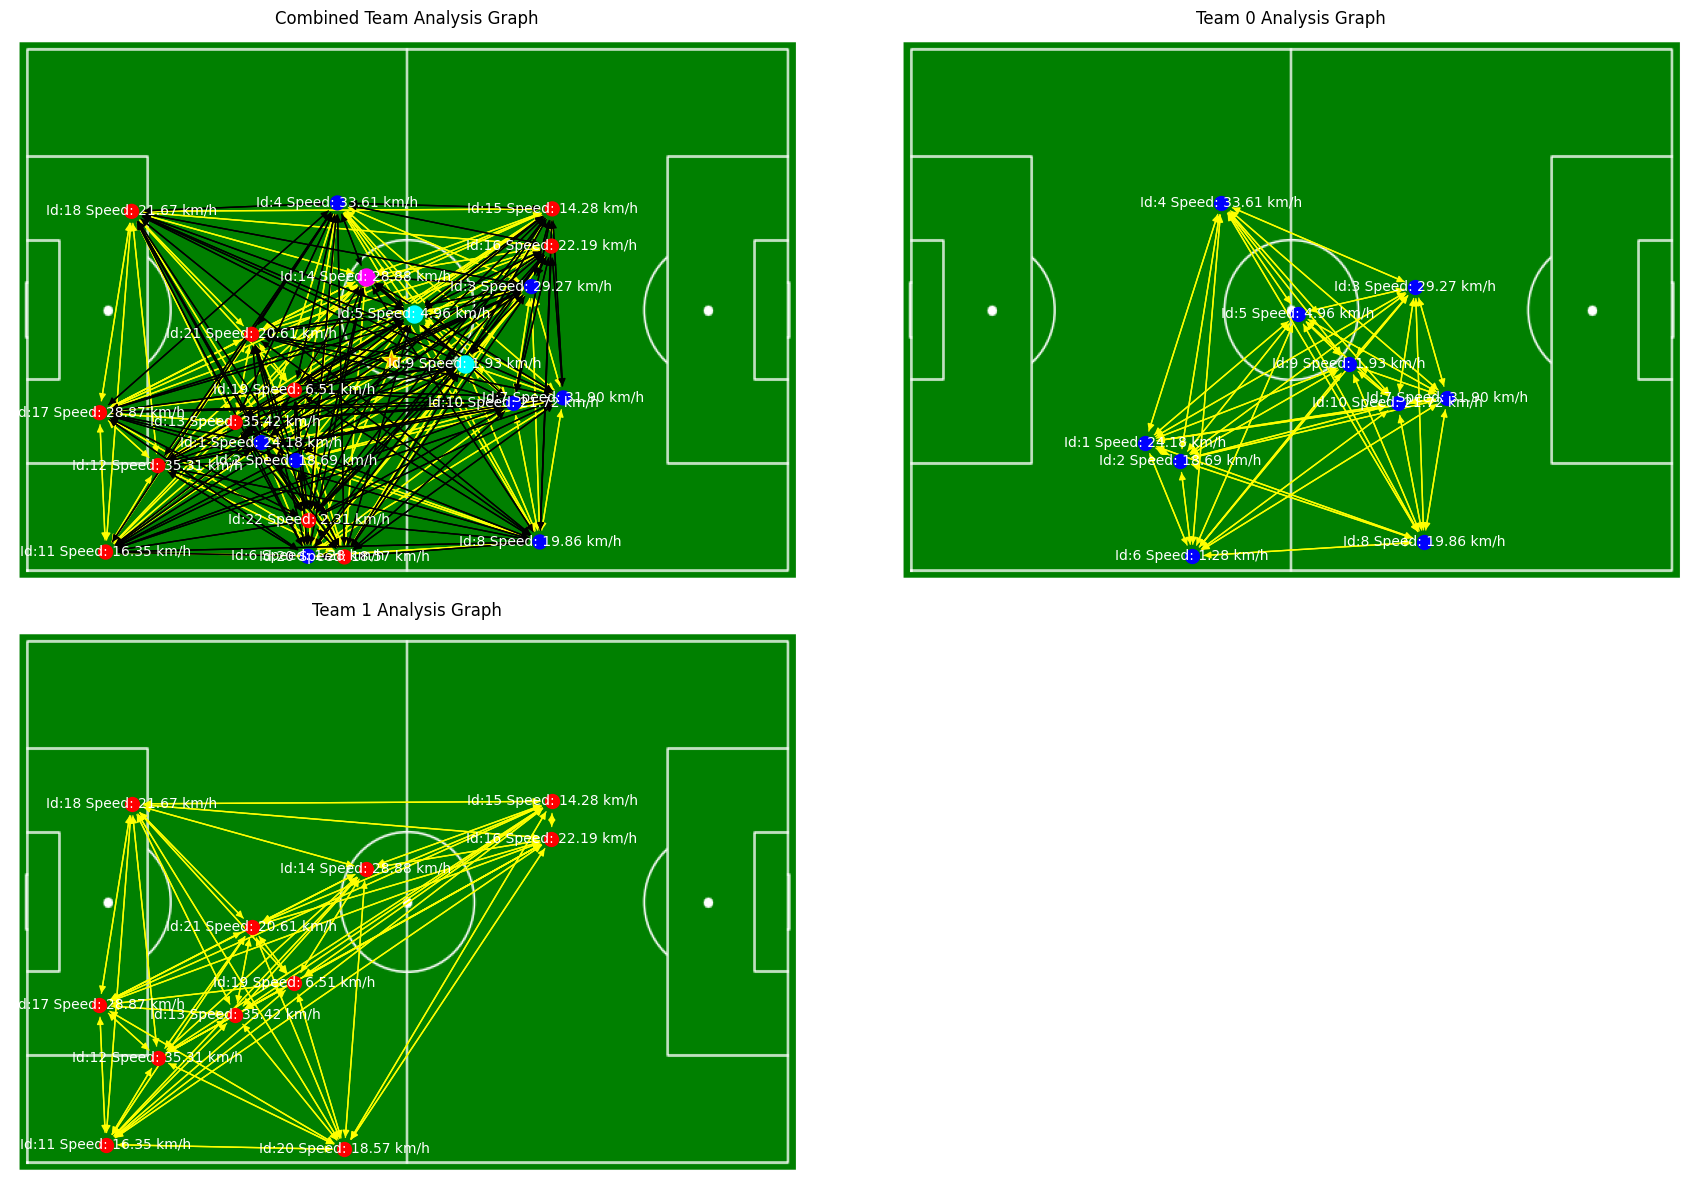

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

def create_relationship_graph(player_boxes, ball_box):
    G = nx.DiGraph()
    player_ids = list(range(1, len(player_boxes) + 1))
    random.shuffle(player_ids)
    
    # nodes for players and ball
    for player_id, player_box in zip(player_ids, player_boxes):
        player_speed = calculate_speed()
        team_id = player_id // 11 
        G.add_node(player_id, bbox=player_box, speed=player_speed, team=team_id)
    G.add_node(0, bbox=ball_box, speed=calculate_speed()) 
    
    # Add edges based on spatial relationships
    for player_id, player_box in zip(player_ids, player_boxes):
        for other_player_id, other_player_box in zip(player_ids, player_boxes):
            if player_id != other_player_id:
                same_team = G.nodes[player_id]['team'] == G.nodes[other_player_id]['team']
                edge_color = 'yellow' if same_team else 'black'
                G.add_edge(player_id, other_player_id, color=edge_color)
    
    for node in G.nodes():
        if 'team' not in G.nodes[node]:
            G.nodes[node]['team'] = G.nodes[node - 1]['team'] if node != 0 else None
    
    return G

def calculate_distance(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    center1 = (x1 + w1 / 2, y1 + h1 / 2)
    center2 = (x2 + w2 / 2, y2 + h2 / 2)
    distance = ((center1[0] - center2[0]) ** 2 + (center1[1] - center2[1]) ** 2) ** 0.5
    return distance

def calculate_speed():
    return np.random.uniform(0, 36)

player_boxes = []
for _ in range(22):  # For 22 players (11 for each team)
    x = random.uniform(0, 800 - 10) 
    y = random.uniform(0, 500 - 10)
    w = random.uniform(10, 30)
    h = random.uniform(10, 30) 
    player_boxes.append((x, y, w, h))

ball_box = (random.uniform(0, 800 - 10), random.uniform(0, 500 - 10), 10, 10)  
G = create_relationship_graph(player_boxes, ball_box)
pos = {n: (d['bbox'][0] + d['bbox'][2] / 2, d['bbox'][1] + d['bbox'][3] / 2) for n, d in G.nodes(data=True)}
distances = {player_id: calculate_distance(G.nodes[player_id]['bbox'], ball_box) for player_id in G.nodes() if player_id != 0}
closest_player_id = min(distances, key=distances.get)
probabilities = {player_id: 1 / (1 + distance) for player_id, distance in distances.items()}

plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.imshow(plt.imread('pitch.png'), extent=[0, 1000, 0, 700])

same_team_edges = [(u, v) for u, v, d in G.edges(data=True) if d['color'] == 'yellow']
nx.draw_networkx_edges(G, pos, edgelist=same_team_edges, edge_color='yellow', arrows=True)
diff_team_edges = [(u, v) for u, v, d in G.edges(data=True) if d['color'] == 'black']
nx.draw_networkx_edges(G, pos, edgelist=diff_team_edges, edge_color='black', arrows=True)

# Draw nodes
team_colors = ['blue' if G.nodes[n]['team'] == 0 else 'red' for n in G.nodes() if n != 0]  # Exclude ball node
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n != 0], node_color=team_colors, node_size=100)
nx.draw_networkx_labels(G, pos, labels={n: f"Id:{n} Speed: {G.nodes[n]['speed']:.2f} km/h" for n in G.nodes() if n != 0}, font_size=10, font_color='white')
nx.draw_networkx_nodes(G, pos, nodelist=[closest_player_id], node_color='green', node_size=200, node_shape='s') 
ball_pos = pos[0]
plt.scatter(ball_pos[0], ball_pos[1], color='orange', s=200, marker='*', edgecolors='yellow') 
top_probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)[:3]  # Top 3 players from each team
for player_id, _ in top_probabilities:
    color = 'cyan' if G.nodes[player_id]['team'] == 0 else 'magenta'
    nx.draw_networkx_nodes(G, pos, nodelist=[player_id], node_color=color, node_size=150)

plt.title('Combined Team Analysis Graph')
plt.axis('off')

# Separate graphs for each team
teams = set(nx.get_node_attributes(G, 'team').values())
for team_id, team_color in zip(teams, ['blue', 'red']):
    plt.subplot(2, 2, team_id + 2)
    plt.imshow(plt.imread('pitch.png'), extent=[0, 1000, 0, 700])
    team_nodes = [n for n in G.nodes() if G.nodes[n]['team'] == team_id]
    team_graph = G.subgraph(team_nodes)
    team_pos = {n: pos[n] for n in team_nodes}
    same_team_edges = [(u, v) for u, v, d in team_graph.edges(data=True) if d['color'] == 'yellow']
    nx.draw_networkx_edges(team_graph, team_pos, edgelist=same_team_edges, edge_color='yellow', arrows=True)
    diff_team_edges = [(u, v) for u, v, d in team_graph.edges(data=True) if d['color'] == 'black']
    nx.draw_networkx_edges(team_graph, team_pos, edgelist=diff_team_edges, edge_color='black', arrows=True)
    nx.draw_networkx_nodes(team_graph, team_pos, node_color=team_color, node_size=100)
    nx.draw_networkx_labels(team_graph, team_pos, labels={n: f"Id:{n} Speed: {G.nodes[n]['speed']:.2f} km/h" for n in team_nodes}, font_size=10, font_color='white')
    plt.title(f'Team {team_id} Analysis Graph')
    plt.axis('off')

plt.tight_layout()
plt.show()